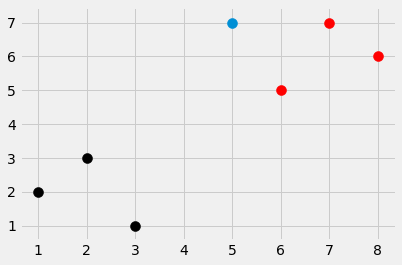

1.0
0.8
1.0
0.6
0.6
0.6
1.0
1.0
Accuracy: 0.9713261648745519


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter
import pandas as pd
import random

style.use('fivethirtyeight')

dataset= {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]

[[plt.scatter(ii[0],ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0],new_features[1], s=100)
plt.show()

def knn_(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than voting groups!')
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])
    
    votes = [i[1] for i in sorted(distances)[:k]]
    
    #print(Counter(votes).most_common(1))
    vote_result = Counter(votes).most_common(1)[0][0]   
    confidence =  Counter(votes).most_common(1)[0][1] / k
    return vote_result, confidence


df = pd.read_csv('./datasets/breast-cancer-wisconsin.data.txt')
df.replace('?', -99999, inplace=True)
df.drop(['id'],1,inplace=True)
#print(df.head())

full_data = df.astype(float).values.tolist()

#print(full_data[:10])
random.shuffle(full_data)
test_size = 0.4
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])


correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote, confidence = knn_(train_set, data, k=5)
        if group == vote:
            correct += 1
        else:
            print(confidence)
        total += 1
print('Accuracy:', correct/total)
accuracies.append(correct/total)
